In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Datetime objects in Python, Numpy, and Pandas

#### Native Python dates and times

In [2]:
# Python: datetime module
from datetime import datetime

d = datetime(year=2021, month=6, day=30)
d

datetime.datetime(2021, 6, 30, 0, 0)

In [3]:
# Once you have a dattime object, you can do things like printing the day of the week:

d.strftime('%B')

'June'

#### Numpy native time series dtype

In [4]:
date = np.array('2015-07-14', dtype=np.datetime64)
date

array('2015-07-14', dtype='datetime64[D]')

In [6]:
# Now we can quickly do vectorized operations on it!

date + np.arange(1,5)

array(['2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18'],
      dtype='datetime64[D]')

In [8]:
# https://numpy.org/doc/stable/reference/arrays.datetime.html
np.datetime64('2015-07-04 12:59:59')

numpy.datetime64('2015-07-04T12:59:59')

#### Pandas time series data type:
* Timestamp
* DatetimeIndex' - Datetime object as Index

In [9]:
t = pd.Timestamp('2021-06-30, 07:50:15')
t

Timestamp('2021-06-30 07:50:15')

In [11]:
# Can pandas read these dates?

dates = pd.to_datetime([datetime(2015,7,3), '4th of July, 2015', '2015-Jul-06', '07-07-2016', '20150708'])

dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2016-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [12]:
# We can use various attributes of datetime object to figure out day, month, year, weekday et
t.quarter

2

In [14]:
# weekday?

t.weekday()
t.day_name()

'Wednesday'

Timestamp documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

### Demo: Working with Timeseries data in pandas

In [16]:
# We will use Ethererum price data from 2017-2020 to demo Pandas capability for time-series data

sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df.head(10)


,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
5,2020-03-13 08-PM,ETHUSD,124.85,1940673.93
6,2020-03-13 08-AM,ETHUSD,128.39,6808571.23
7,2020-03-13 07-PM,ETHUSD,134.03,7579741.09
8,2020-03-13 07-AM,ETHUSD,131.35,5255468.75
9,2020-03-13 06-PM,ETHUSD,128.93,4898735.81


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Close   23674 non-null  float64
 3   Volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


In [18]:
# check for nulls
df.isnull().sum()

Date      0
Symbol    0
Close     0
Volume    0
dtype: int64

In [ ]:
# If you run this code it will try to plot everything and will take forever.
#plt.plot(df.Date, df.Close)

<AxesSubplot:>

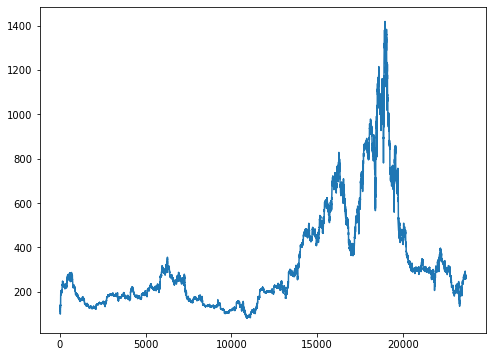

In [20]:
# use Pandas .plot()

df.Close.plot()

### Time series analysis: How to make pandas time-aware and leverage inbuild functionality:
1. Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())